https://machinelearningmastery.com/predict-sentiment-movie-reviews-using-deep-learning/

### IMDB 电影评论情绪问题描述
该数据集是大型电影评论数据集，通常称为 IMDB 数据集。

IMDB 数据集包含 25,000 条高度极性的电影评论（好或坏），用于训练，同样数量用于测试。问题是确定给定的电影评论是具有积极情绪还是消极情绪。

这些数据由斯坦福大学的研究人员收集，并用于2011 年的一篇论文[PDF]，其中将 50/50 的数据用于训练和测试。准确率达到了 88.89%。

这些数据还被用作 2014 年末至 2015 年初 Kaggle 竞赛“词袋遇上爆米花袋”的基础。准确率达到 97% 以上，获胜者达到 99%。

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [2]:
# summarize size
print("Training data: ")
print(X.shape)
print(y.shape)


Training data: 
(50000,)
(50000,)


In [3]:
...
# Summarize number of classes
print("Classes: ")
print(np.unique(y))


Classes: 
[0 1]


In [4]:
# 接下来，您可以了解数据集中唯一单词的总数。


# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))


Number of words: 
88585


Review length: 
Mean 234.76 words (172.911495)


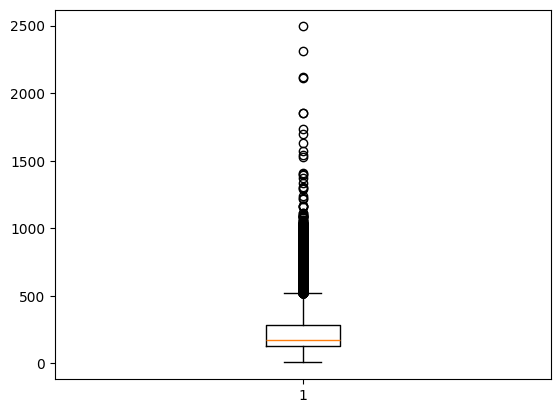

In [5]:
...
# Summarize review length您可以了解平均评论长度
# 平均评论字数略少于 300 个字，标准差略多于 200 个字。
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()


### 词嵌入
自然语言处理领域的一个最新突破被称为词嵌入。

该技术是将单词编码为高维空间中的实值向量，其中单词之间在意义上的相似性转化为向量空间中的接近性。

离散词被映射到连续数字的向量。这在使用神经网络和深度学习模型处理自然语言问题时非常有用，因为它们需要数字作为输入。

Keras 提供了一种方便的方法，通过Embedding 层将单词的正整数表示转换为词嵌入。

该层采用定义映射的参数，包括预期单词的最大数量，也称为词汇量（例如，将被视为整数的最大整数值）。该层还允许您指定每个单词向量的维数，称为输出维数。

您想对 IMDB 数据集使用词嵌入表示。

假设您只对数据集中最常用的前 5,000 个单词感兴趣。因此，您的词汇量将为 5,000。您可以选择使用 32 维向量来表示每个单词。最后，您可以选择将最大评论长度限制为 500 个单词，截断超过该长度的评论，并使用 0 值填充短于该长度的评论。

您将按如下方式加载 IMDB 数据集：

In [6]:
imdb.load_data(nb_words=5000)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [8]:
# MLP for the IMDB problem
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence


In [9]:
...
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)


您将把评论限制在 500 字以内，截断较长的评论，并用零填充较短的评论。


In [10]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)


In [11]:

...
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.summary()


d:\ProgramData\anaconda3\envs\ai\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
...
# Fit the model
model.fit(X_train, y_train, validation_data=(
    X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/2
196/196 - 9s - 47ms/step - accuracy: 0.7728 - loss: 0.4439 - val_accuracy: 0.8630 - val_loss: 0.3141
Epoch 2/2
196/196 - 8s - 40ms/step - accuracy: 0.9367 - loss: 0.1704 - val_accuracy: 0.8604 - val_loss: 0.3406
Accuracy: 86.04%
